Taller 2: Uso de Algoritmos de ML

Nombre: Joaquin F Sanchez

Cedula: **888888**

**Pasos para la solución de los ejercicios**



1.   Escoger un data set que que tenga datos de manera numerica o que sea facil su conversión a datos numericos. (Algoritmo de ML como Kmeans o Kvecino funcionan con datos numericos)
2.  Hace un análisis previo para entender el comportamiento de los datos.
3. Si es necesario se puede construir un data set para la realización del taller. (Este nuevo data set contiene los datos cargados desde el portal de datos.gov)
4. Identificar X=[ 'datos de entrada' ] e y=['datos de salida' ]
5. Hacer la división de los datos. Utilizar el split() ***train_test_split***
6. Implementar el modelo (clasificación o agrupamiento). Verifique los datos de entrada y los datos de salida. Recuerde que para la clasificación de Kvecinos se necesitan etiquetas
7. Revisar el score o la metrica de rendimiento.
8. Hacer el análisis de los resultados


NOTA: poder usar data set que no esten en el portal, tambien es valido


In [2]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [2]:
#Punto 1
#Clasificación
#Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("fc78-ab9i")
df=pd.DataFrame.from_records(result)
df.head()


,cod,deptos,cod_mun,municipio,a_o,tasa_natalidad,nacimientos,tasa_fecundidad_gral,mujer_15_a_49_a_os,mujer_10_a_49_a_os,...,tasa_incidencia_violencia_1,casos_violencia_60_a_os,tasa_incidencia_violencia_2,casos_violencia_5_a_os,tasa_incidencia_violencia_3,tasa_de_mortalidad_en_5_a,nacidos_con_bajo_peso_o_37,tasa_mortalida_perinatal,tasa_fecund_10_14_a_os,tasa_fecund_15_19_a_os
0,68.001,SANTANDER,68.001,Bucaramanga,2008,18.14,9.457,63.14,149.769,172.174,...,0.00,0,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN
1,68.001,SANTANDER,68.001,Bucaramanga,2009,16.85,8.807,59.00,149.264,171.436,...,263.72,99,167.46,5,10.89,2.63,NaN,NaN,NaN,NaN
2,68.001,SANTANDER,68.001,Bucaramanga,2010,16.03,8.402,56.55,148.569,170.459,...,297.37,121,199.27,8,17.65,2.66,NaN,NaN,NaN,NaN
3,68.001,SANTANDER,68.001,Bucaramanga,2011,16.88,8.866,60.02,147.724,169.288,...,469.13,342,548.94,34,76.05,0.00,NaN,NaN,NaN,NaN
4,68.001,SANTANDER,68.001,Bucaramanga,2012,17.38,9.142,62.31,146.727,167.894,...,389.89,271,423.62,256,580.58,2.73,NaN,NaN,NaN,NaN


In [ ]:
#Realice las tareas de limpieza necesarias
#Verificar los datos desde el data Set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 117 entries, cod to tasa_fecund_15_19_a_os
dtypes: object(117)
memory usage: 12.9+ KB


In [ ]:
df.describe()

,cod,deptos,cod_mun,municipio,a_o,tasa_natalidad,nacimientos,tasa_fecundidad_gral,mujer_15_a_49_a_os,mujer_10_a_49_a_os,...,tasa_incidencia_violencia_1,casos_violencia_60_a_os,tasa_incidencia_violencia_2,casos_violencia_5_a_os,tasa_incidencia_violencia_3,tasa_de_mortalidad_en_5_a,nacidos_con_bajo_peso_o_37,tasa_mortalida_perinatal,tasa_fecund_10_14_a_os,tasa_fecund_15_19_a_os
count,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,4,1,1,1
unique,2,1,2,1,14,14,14,14,14,14,...,12,12,12,12,13,8,4,1,1,1
top,68.001,SANTANDER,68.001,Bucaramanga,2008,18.14,9.457,63.14,149.769,172.174,...,0.00,0,0.00,0,0.00,0.00,1.9,12.6,0.35,14.6
freq,13,14,13,14,1,1,1,1,1,1,...,3,3,3,2,2,7,1,1,1,1


In [ ]:
#se visualizan todas las columanas de un Data Frame
pd.options.display.max_columns = None

In [ ]:
df


,cod,deptos,cod_mun,municipio,a_o,tasa_natalidad,nacimientos,tasa_fecundidad_gral,mujer_15_a_49_a_os,mujer_10_a_49_a_os,mujeres_madres_o_embarazadas,parto_inst,ncv_4_cpn,ncv_4_cpn_1,mujeres_gestantes_sifilis,proporci_n_mujeres_sifilis,muertes_maternas,raz_n_mortalidad_materna,mujeres_embarazadas_10_a,mujeres_embarazadas_10_a_1,mujeres_embarazadas_15_a,mujeres_embarazadas_15_a_1,tasa_fecundidad_adolescentes,nacidos_vivos_peso_2500_gr,nacidos_vivos_peso_2500_gr_1,nacidos_vivos_peso_2500_gr_2,nacidos_vivos_peso_2500_gr_3,nacidos_vivos_de_mujeres,nacidos_vivos_de_mujeres_1,muertes,tm_general,muerte_enfermedad,tm_trasmisibles,muertes_por_neoplasias,tasa_mortalidad_por_neoplasias,muerte_enfermedades_cerebro,tasa_de_mortalidad_por,muerte_causa_externa,tm_causa_externa,muerte_5a_os,tm_ni_ez_5a_os,muerte_1a_os,tasa_de_mortalidad_infantil,muerte_infecci_n_respiratoria,tasa_de_mortalidad_por_infecci,muerte_tumor_de_cuello_de,tasa_de_mortalidad_por_tumor,muerte_tumor_de_estomago,tasa_de_mortalidad_tumor,muerte_tumor_de_pr_stata,tasa_de_mortalidad_tumor_1,casos_prevalentes_vih,prevalencia_vih_sida,prevalencia_vih_sida_15_a,casos_nuevos_vih_sida,incidencia_vih_sida,muertes_vih_sida,tm_vih_sida,casos_nuevos_tuberculosis,tasa_incidencia_tuberculosis,tasa_de_mortalidad_por_1,tasa_hospitalizaci_n,usuario_tuberculosis,proporci_n_tuberculosis,curaci_n_tb_pulmonar,incidencia_lepra,curaci_n_lepra,incidencia_dengue_grave,incidencia_dengue,muerte_dengue,letalidad_dengue,casos_sifilis_cong_nita,tasa_iincidencia_sifilis,casos_sifilis_gestacional,tasa_incidencia_sifilis,casos_rabia_humana,casos_diabetes_mellitus,tasa_mortalidad_diabetes,c_ncer_mama,tasa_mortalidad_c_ncer_mama,ni_os_1_a_o_con_3_dosis_dpt,cobertura_3_dosis_dpt_1_a,ni_os_1_a_o_con_3_dosis_polio,cobertura_3_dosis_polio_1,ni_os_1_a_o_con_3_dosis,cobertura_3_dosis_pentavalente,ni_os_vacunados_con_bcg,cobertura_bcg_nica_dosis,ni_os_vacunados_triple_viral,cobertura_triple_viral,ni_os_1_a_o_vacunados_fiebre,cobertura_ni_os_1_a_o,ni_os_1_a_o_vacunados,cobertura_1_a_o_vacunados,ni_os_1_a_o_vacunados_2_dosis,cobertura_1_a_o_vacunados_1,ni_as_9_a_os_vacunadas_vph,cobertura_ni_as_9_a_os,indice_cop_12_a_os,_15_a_os_con_leucemias,tasa_incidencia_leucemias,tasa_mortalidad_c_ncer_inf,violencia_intrafamiliar,tasa_incidencia_violencia,casos_violencia_sexual_5,tasa_violencia_sexual_5_a,casos_violencia_de_genero,tasa_incidencia_violencia_1,casos_violencia_60_a_os,tasa_incidencia_violencia_2,casos_violencia_5_a_os,tasa_incidencia_violencia_3,tasa_de_mortalidad_en_5_a,nacidos_con_bajo_peso_o_37,tasa_mortalida_perinatal,tasa_fecund_10_14_a_os,tasa_fecund_15_19_a_os
0,68.001,SANTANDER,68.001,Bucaramanga,2008,18.14,9.457,63.14,149.769,172.174,5.49,99.43,90,89.95,0.00,0.00,1,10.57,1.627,17.20,1.627,17.20,68.98,848,8.97,298,3.94,56,0.59,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,103,10.89,97,10.26,2,5.20,26,9.54,80,15.34,34,13.66,0,0.00,0.00,84,16,60,12,248,47.56,6.14,6.90,0,0.00,61.22,1.92,30.00,"97,42","233,59",0,0,10,1.06,45,4.76,0,172,32.99,36,13.21,10.058,134.59,10.058,134.59,10.058,134.59,0,0.00,9.536,127.61,9.536,127.61,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,11.11,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,NaN,NaN,NaN,NaN
1,68.001,SANTANDER,68.001,Bucaramanga,2009,16.85,8.807,59.00,149.264,171.436,5.14,99.57,90,89.64,0.00,0.00,4,45.42,1.675,19.02,1.636,18.58,70.58,737,8.37,227,3.02,46,0.52,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,100,11.35,89,10.11,6,15.77,34,12.45,57,10.90,42,16.81,0,0.00,0.00,114,22,53,10,238,45.52,1.91,0.00,1,0.42,69.17,1.91,60.00,"166,22","427,12",2,"0,2",11,1.25,40,4.54,0,157,30.03,50,18.31,9.385,125.54,9.385,125.54,9.385,125.54,0,0.00,10.122,135.39,10.06,134.56,6.699,89.61,353,4.72,0,0.00,0.00,0.00,0.00,10.47,908,173.68,29,329.28,720,263.72,99,167.46,5,10.89,2.63,NaN,NaN,NaN,NaN
2,68.001,SANTANDER,68.001,Bucaramanga,2010,16.03,8.402,56.55,148.569,170.459,4.93,99.82,92,91.58,0.00,0.00,0,0.00,1.519,18.08,1.463,17.41,64.07,719,8.56,211,2.82,49,0.58,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,87,10.35,81,9.64,7,18.59,

In [ ]:
#análisis previo de los datos
a_n=list(df['a_o'])
for i in a_n:
  print(i)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [ ]:
#Numero de mujeres embarazadas de 10 a 19 años
muj_emb=list(df['mujeres_embarazadas_10_a'])
for i in muj_emb:
  print(i)

1.627
1.675
1.519
1.745
1.86
1.775
1.617
1.621
1.096
1.284
1.104
nan
356
162


In [ ]:
type(muj_emb[0])

str

In [ ]:
float(muj_emb[0])

1.627

In [ ]:
num_emba_2=list(df['mujeres_embarazadas_15_a'])

num_emba_3=list(df['mujer_15_a_49_a_os'])

In [ ]:
#Construir un dataFrame para hacer la clasificación

new_df=pd.DataFrame(df['a_o'])
new_df['Tasa_natalidad']=df['tasa_natalidad']
new_df['nacimientos']=df['nacimientos']
new_df['Casos Sifilis']=df['mujeres_gestantes_sifilis']
new_df['Tasa_mortalidad']=df['tasa_mortalidad_c_ncer_mama']

new_df

,a_o,Tasa_natalidad,nacimientos,Casos Sifilis,Tasa_mortalidad
0,2008,18.14,9.457,0.00,13.21
1,2009,16.85,8.807,0.00,18.31
2,2010,16.03,8.402,0.00,17.19
3,2011,16.88,8.866,0.00,11.69
4,2012,17.38,9.142,0.00,14.24
5,2013,17.65,9.299,5.00,22.26
6,2014,17.87,9.423,22.00,23.34
7,2015,18.36,9.693,16.00,22.25
8,2016,13.51,7.139,12.00,9.48
9,2017,14.60,7.739,54.00,23.30


In [ ]:
#Convertir los datos del data Frame de str a numericos solo la ultima columna
salida=pd.to_numeric(new_df['Tasa_mortalidad'], errors='coerce')
print(type(salida))
y=np.array(salida)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
#Vamos a colocar etiquetas a la salida
#El proposito es saber si un año es bueno o es malo
#Se debe estimar un umbral para estas etiquetas
#imprimr la salida
for i in y:
  print(i)

13.21
18.31
17.19
11.69
14.24
22.26
23.34
22.25
9.48
23.3
4.53
1.36
8.78
18.2


In [ ]:
print('La media de la tasa de mortalidad es: ',np.mean(y))

La media de la tasa de mortalidad es:  14.867142857142857


In [ ]:
#La estiquetas son de la siguiente forma:
#si el valor esta por debajo de la media es bueno y la etiqueta es 0
#si el valor esta por encima de la media el malo y la etiqueta es 1
#Colocamos las etiquetas
#salida esperada es: y_
y_=[]
for i in range(len(y)):
  if y[i]<= np.mean(y):
    y_.append(0)
  else:
    y_.append(1)

print(y_)

out=np.array(y_)
print(out)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
[0 1 1 0 0 1 1 1 0 1 0 0 0 1]


In [ ]:
#Se crean arreglos de numpy
col1=pd.to_numeric(new_df['a_o'], errors='coerce')
col2=pd.to_numeric(new_df['Tasa_natalidad'], errors='coerce')
col3=pd.to_numeric(new_df['nacimientos'], errors='coerce')
col4=pd.to_numeric(new_df['Casos Sifilis'], errors='coerce')
x1=np.array(col1)
x2=np.array(col2)
x3=np.array(col3)
x4=np.array(col4)


In [ ]:
#Se crea la matriz para los datos de entrada
Salida=[]
for i in range(len(col1)):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    aux.append(x4[i])
    Salida.append(aux)
X=np.array(Salida)
X

array([[2.008e+03, 1.814e+01, 9.457e+00, 0.000e+00],
       [2.009e+03, 1.685e+01, 8.807e+00, 0.000e+00],
       [2.010e+03, 1.603e+01, 8.402e+00, 0.000e+00],
       [2.011e+03, 1.688e+01, 8.866e+00, 0.000e+00],
       [2.012e+03, 1.738e+01, 9.142e+00, 0.000e+00],
       [2.013e+03, 1.765e+01, 9.299e+00, 5.000e+00],
       [2.014e+03, 1.787e+01, 9.423e+00, 2.200e+01],
       [2.015e+03, 1.836e+01, 9.693e+00, 1.600e+01],
       [2.016e+03, 1.351e+01, 7.139e+00, 1.200e+01],
       [2.017e+03, 1.460e+01, 7.739e+00, 5.400e+01],
       [2.018e+03, 1.380e+01, 7.327e+00, 8.400e+01],
       [2.019e+03, 1.050e+01, 5.552e+00, 8.500e+01],
       [2.020e+03, 9.700e+00, 5.905e+03, 1.250e+02],
       [2.021e+03, 9.040e+00, 5.595e+03, 1.720e+02]])

In [ ]:
print(X[0])
print('---------')
print(out[0])

[2008.      18.14     9.457    0.   ]
---------
0


In [ ]:
#Armamos el modelo. De clasificación o de agrupamiento
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,out, test_size=0.1) # para este data set lo coloco en 10%


In [ ]:
#los datos de prueba que van para el modelo

print(X_test)
print('--------------------------')
print(y_test)

[[2010.      16.03     8.402    0.   ]
 [2016.      13.51     7.139   12.   ]]
--------------------------
[1 0]


In [ ]:
#Los datos de entrenamiento
print(X_train)
print('--------------------------')
print(y_train)


[[2.021e+03 9.040e+00 5.595e+03 1.720e+02]
 [2.008e+03 1.814e+01 9.457e+00 0.000e+00]
 [2.011e+03 1.688e+01 8.866e+00 0.000e+00]
 [2.015e+03 1.836e+01 9.693e+00 1.600e+01]
 [2.018e+03 1.380e+01 7.327e+00 8.400e+01]
 [2.013e+03 1.765e+01 9.299e+00 5.000e+00]
 [2.020e+03 9.700e+00 5.905e+03 1.250e+02]
 [2.019e+03 1.050e+01 5.552e+00 8.500e+01]
 [2.017e+03 1.460e+01 7.739e+00 5.400e+01]
 [2.012e+03 1.738e+01 9.142e+00 0.000e+00]
 [2.014e+03 1.787e+01 9.423e+00 2.200e+01]
 [2.009e+03 1.685e+01 8.807e+00 0.000e+00]]
--------------------------
[1 0 0 1 0 1 0 0 1 0 1 1]


In [ ]:
#Modelo de clasificación
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Revisar la metrica
Knn.score(X_test,y_test)

0.0

In [ ]:
observacion=[[2022,10.1,6595,180]]
print(observacion)
ob=np.array(observacion)
print(ob)
ob.reshape(1,-1)
print(ob)


[[2022, 10.1, 6595, 180]]
[[2022.    10.1 6595.   180. ]]
[[2022.    10.1 6595.   180. ]]


In [ ]:
#La clasificación no es buena
Knn.predict(ob)

array([1])

In [ ]:
#Para los datos del 2022 que fueron datos aleatorios
#El resultado es que el años fue malo

In [ ]:
#Armamos el modelo. De clasificación o de agrupamiento
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,out, test_size=0.1)
print(X_test)
print('--------------------------')
print(y_test)

[[2015.      18.36     9.693   16.   ]
 [2008.      18.14     9.457    0.   ]]
--------------------------
[1 0]


In [ ]:
#Aplicar el algoritmo de clasificación de los K vecinos más cercanos
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2, max_iter=500)
Kmeans.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=2)

In [ ]:
#Calcular los puntajes de la clasificación
objetivos_=Kmeans.fit_predict(X_test,y_test)
objetivos_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1], dtype=int32)

In [ ]:
Kmeans.score(X_test,y_test)

-0.0

In [3]:
#Punto 2
#Agrupamiento
#Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("ezyw-egbj")
df2=pd.DataFrame.from_records(result)
df2.head()

,a_o,trimestre,proveedor,segmento,terminal,tecnolog_a,no_abonados
0,2021,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,4G,2445692
1,2021,3,SUMA MOVIL S.A.S.,PREPAGO,TEL�FONO M�VIL,3G,708
2,2021,1,COLOMBIA MOVIL S.A ESP,POSPAGO,TEL�FONO M�VIL,4G,3026
3,2021,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,3G,650189
4,2021,3,COLOMBIA MOVIL S.A ESP,PREPAGO,DATA CARD,3G,1472


In [4]:
#Información del dataSet
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   a_o          612 non-null    object
 1   trimestre    612 non-null    object
 2   proveedor    612 non-null    object
 3   segmento     612 non-null    object
 4   terminal     612 non-null    object
 5   tecnolog_a   612 non-null    object
 6   no_abonados  612 non-null    object
dtypes: object(7)
memory usage: 33.6+ KB


In [5]:
df2.describe()

,a_o,trimestre,proveedor,segmento,terminal,tecnolog_a,no_abonados
count,612,612,612,612,612,612,612
unique,3,4,13,2,2,3,558
top,2022,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,4G,0
freq,217,155,144,408,409,240,11


In [6]:
#Realice las tareas de limpieza necesarias

#Revisar cuantos proveedores hay
prov=list(df2['proveedor'])
for i in prov:
  print(i)

COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
SUMA MOVIL S.A.S.
COLOMBIA MOVIL  S.A ESP
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
COLOMBIA MOVIL  S.A ESP
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
LOGISTICA FLASH COLOMBIA S.A.S
SUMA MOVIL S.A.S.
SUMA MOVIL S.A.S.
COLOMBIA MOVIL  S.A ESP
COLOMBIA MOVIL  S.A ESP
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
COMUNICACION CELULAR S A COMCEL S A
COMUNICACION CELULAR S A COMCEL S A
VIRGIN MOBILE COLOMBIA S.A.S.
ALMACENES EXITO INVERSIONES S.A.S.
COLOMBIA MOVIL  S.A ESP
COLOMBIA MOVIL  S.A ESP
COLOMBIA MOVIL  S.A ESP
COLOMBIA MOVIL  S.A ESP
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
VIRGIN MOBILE COLOMBIA S.A.S.
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
SETROC MOBILE GROUP SAS
LOGISTICA FLASH COLOMBIA S.A.S
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP
COMUNICACION CELULAR S A COMCEL S A
COLOMBIA MOVIL  S.A ESP
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP
COMUNICACION CELULAR S 

In [7]:
#Analisis del Data Set
df2['proveedor']

0      COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
1                            SUMA MOVIL S.A.S.
2                      COLOMBIA MOVIL  S.A ESP
3      COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
4                      COLOMBIA MOVIL  S.A ESP
                        ...                   
607        COMUNICACION CELULAR S A COMCEL S A
608             LOGISTICA FLASH COLOMBIA S.A.S
609        COMUNICACION CELULAR S A COMCEL S A
610                    COLOMBIA MOVIL  S.A ESP
611              VIRGIN MOBILE COLOMBIA S.A.S.
Name: proveedor, Length: 612, dtype: object

In [8]:
#se usa el oneHotEncoder para transformar los operadores de variables categoricas en
#representación numerica
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
pro=list(df2['proveedor'])
pro_n=np.array(pro)
pro_c=pro_n.reshape(-1,1)
pro_=encoder.fit_transform(pro_c)
print(pro_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
#Probar la codificación
print(pro_[0], pro[0])
print(pro_[3], pro[3])
print(pro_[1], pro[1])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] SUMA MOVIL S.A.S.


In [10]:
print(len(pro_[0]))

13


In [11]:
def contar(n, vec):
  '''Para esta funcion n es el numero a contar y vec es la lista donde contar '''
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

In [12]:
#
cp=[]#Nuemro de veces que aparece el proveedor
dic_O={}#El dicionario tiene clave el nombre del operador y como valor las veces que se repite
for i in range(len(pro)):
  dic_O[pro[i]]=contar(pro[i],pro)
print(dic_O)

{'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.': 144, 'SUMA MOVIL S.A.S.': 24, 'COLOMBIA MOVIL  S.A ESP': 120, 'LOGISTICA FLASH COLOMBIA S.A.S': 36, 'COMUNICACION CELULAR S A COMCEL S A': 144, 'VIRGIN MOBILE COLOMBIA S.A.S.': 36, 'ALMACENES EXITO INVERSIONES S.A.S.': 19, 'SETROC MOBILE GROUP SAS': 9, 'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP': 35, 'AVANTEL S.A.S': 20, 'PARTNERS TELECOM COLOMBIA SAS': 15, 'LOV TELECOMUNICACIONES SAS': 4, 'CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P': 6}


In [13]:
#Los nombres de los operadores
for nom, valor in enumerate(dic_O):
  print(nom, valor)

0 COLOMBIA TELECOMUNICACIONES S.A. E.S.P.
1 SUMA MOVIL S.A.S.
2 COLOMBIA MOVIL  S.A ESP
3 LOGISTICA FLASH COLOMBIA S.A.S
4 COMUNICACION CELULAR S A COMCEL S A
5 VIRGIN MOBILE COLOMBIA S.A.S.
6 ALMACENES EXITO INVERSIONES S.A.S.
7 SETROC MOBILE GROUP SAS
8 EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP
9 AVANTEL S.A.S
10 PARTNERS TELECOM COLOMBIA SAS
11 LOV TELECOMUNICACIONES SAS
12 CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P


In [14]:
#Utilizar pandas para agrupar
#datosV.pivot_table(values='cantidad', index='departamento', columns=['zona'], aggfunc='count')
df2.pivot_table(values='a_o', index='proveedor', columns=['segmento'], aggfunc='count')

segmento,POSPAGO,PREPAGO
proveedor,,
ALMACENES EXITO INVERSIONES S.A.S.,NaN,19.0
AVANTEL S.A.S,NaN,20.0
CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P,NaN,6.0
COLOMBIA MOVIL S.A ESP,60.0,60.0
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,72.0,72.0
COMUNICACION CELULAR S A COMCEL S A,72.0,72.0
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,NaN,35.0
LOGISTICA FLASH COLOMBIA S.A.S,NaN,36.0
LOV TELECOMUNICACIONES SAS,NaN,4.0


In [15]:
df2.pivot_table(values='no_abonados', index='proveedor', columns=['trimestre'], aggfunc='count')

trimestre,1,2,3,4
proveedor,,,,
ALMACENES EXITO INVERSIONES S.A.S.,5.0,5.0,5.0,4.0
AVANTEL S.A.S,6.0,6.0,4.0,4.0
CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P,NaN,2.0,2.0,2.0
COLOMBIA MOVIL S.A ESP,30.0,30.0,30.0,30.0
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,36.0,36.0,36.0,36.0
COMUNICACION CELULAR S A COMCEL S A,36.0,36.0,36.0,36.0
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,9.0,9.0,9.0,8.0
LOGISTICA FLASH COLOMBIA S.A.S,9.0,9.0,9.0,9.0
LOV TELECOMUNICACIONES SAS,1.0,1.0,1.0,1.0


In [16]:
df2.pivot_table(values='no_abonados', index='proveedor', columns=['trimestre'], aggfunc='sum')

trimestre,1,2,3,4
proveedor,,,,
ALMACENES EXITO INVERSIONES S.A.S.,217539157932109930300198812,23622118271829158980325797,24423218147920402504255248,35289821764727546318722
AVANTEL S.A.S,336836467880643113289521,26837242255964415654511,27922816428627302,19101356559317495
CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P,NaN,1236,803,1023
COLOMBIA MOVIL S.A ESP,3026342159135826907253366610677100183193403169...,2567281373494443223449810544720449120411601263...,1472248701156612841626310222868003047540170306...,1194356771036714433818275381563625330512511587...
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,2390724135102587122212816237110868632972838418...,2445692203992689116767970111259175129306320817...,6501891116806225811172097839897327967259921124...,9066150973137193515752761928910266546832763320...
COMUNICACION CELULAR S A COMCEL S A,4762130119730283860429899244662578505618422019...,1965551532937284075517253750163037874650403970...,1997068852830810262355102427315735111408542981...,6759337247119326281071920532877325028471237612...
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,9112216181735867352657228057522266113666,8231912131632548410625020359395816863671,138297510790122899853422483652453750120,111276296589018870178395355413465379
LOGISTICA FLASH COLOMBIA S.A.S,90370194081887050619093751447116857713,13556110816841098664858568110590924689,67757809796104057355795106413056577,7830687634124753279998553357053791
LOV TELECOMUNICACIONES SAS,1038,1392,1443,1908


In [17]:
#Covertir la información del data set en información numerica
a=list(df2['a_o'])
for i in range(len(a)):
  a[i]=int(a[i])

an=np.array(a)

t=list(df2['trimestre'])
for i in range(len(t)):
  t[i]=int(t[i])

tn=np.array(t)

ab=list(df2['no_abonados'])
for i in range(len(ab)):
  ab[i]=int(ab[i])
abn=np.array(ab)


In [18]:
df2.head(1)

,a_o,trimestre,proveedor,segmento,terminal,tecnolog_a,no_abonados
0,2021,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,4G,2445692


In [19]:
new_df2=pd.DataFrame(an)
new_df2['Trimestre']=tn
new_df2['Operador']=df2['proveedor']
new_df2['Segmento']=df2['segmento']
new_df2['Terminal']=df2['terminal']
new_df2['Tecg']=df2['tecnolog_a']
new_df2['Abonados']=df2['no_abonados']
new_df2

,0,Trimestre,Operador,Segmento,Terminal,Tecg,Abonados
0,2021,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,4G,2445692
1,2021,3,SUMA MOVIL S.A.S.,PREPAGO,TEL�FONO M�VIL,3G,708
2,2021,1,COLOMBIA MOVIL S.A ESP,POSPAGO,TEL�FONO M�VIL,4G,3026
3,2021,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,3G,650189
4,2021,3,COLOMBIA MOVIL S.A ESP,PREPAGO,DATA CARD,3G,1472
...,...,...,...,...,...,...,...
607,2022,4,COMUNICACION CELULAR S A COMCEL S A,POSPAGO,DATA CARD,2G,2
608,2022,4,LOGISTICA FLASH COLOMBIA S.A.S,PREPAGO,TEL�FONO M�VIL,4G,53791
609,2022,4,COMUNICACION CELULAR S A COMCEL S A,POSPAGO,TEL�FONO M�VIL,4G,2752
610,2022,4,COLOMBIA MOVIL S.A ESP,PREPAGO,DATA CARD,4G,2523


In [20]:
new_df2.pivot_table(values='Abonados', index='Operador', columns=['Trimestre'], aggfunc='count')

Trimestre,1,2,3,4
Operador,,,,
ALMACENES EXITO INVERSIONES S.A.S.,5.0,5.0,5.0,4.0
AVANTEL S.A.S,6.0,6.0,4.0,4.0
CELLVOZ COLOMBIA SERVICIOS INTEGRALES S A E S P,NaN,2.0,2.0,2.0
COLOMBIA MOVIL S.A ESP,30.0,30.0,30.0,30.0
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,36.0,36.0,36.0,36.0
COMUNICACION CELULAR S A COMCEL S A,36.0,36.0,36.0,36.0
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,9.0,9.0,9.0,8.0
LOGISTICA FLASH COLOMBIA S.A.S,9.0,9.0,9.0,9.0
LOV TELECOMUNICACIONES SAS,1.0,1.0,1.0,1.0


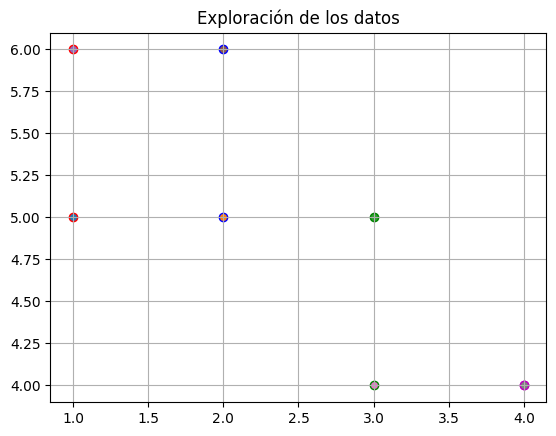

In [21]:
#Una exploración de como podrían quedar los datos
plt.scatter(1,5,edgecolors='r')
plt.scatter(2,5,edgecolors='b')
plt.scatter(3,5,edgecolors='g')
plt.scatter(4,4,edgecolors='m')


plt.scatter(1,6,edgecolors='r')
plt.scatter(2,6,edgecolors='b')
plt.scatter(3,4,edgecolors='g')
plt.scatter(4,4,edgecolors='m')
plt.title('Exploración de los datos')
plt.grid()
plt.show()

In [22]:
new_df2.head(1)

,0,Trimestre,Operador,Segmento,Terminal,Tecg,Abonados
0,2021,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,4G,2445692


In [23]:
#realizar las operaciones de conversión faltantes
#Pasar del nombre del operador a la codificación
#Pasar de 4G, 3G, 2G a 4,3,2
#Pasar el segmento Prepago 0 y Postpago 1
#Pasar el terminal Movil=1, data card=0

#convertir el operador
print(pro_[1], pro[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] SUMA MOVIL S.A.S.


In [24]:
print('Tamaño del vector codificado',len(pro_))
print('Tamaño de la columna operador', len(new_df2['Operador']))

Tamaño del vector codificado 612
Tamaño de la columna operador 612


In [25]:
#se revisa el vector
vec=pro_[0]
print(vec)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
print('Numero a convertir', vec)
cont=len(vec)-1
for i in vec:
  if i==1:
    num=pow(2,cont)
  else:
    cont-=1
print('Numero convertido',num)

Numero a convertir [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Numero convertido 256


In [27]:
print(pow(2,8))


256


In [28]:
#Crear una función para la conversion
def bin2dec(v):
  '''Esta función recibe como parametro el vector con la codificación del operador '''
  cont=len(v)-1
  for i in v:
    if i==1:
      num=pow(2,cont)
    else:
      cont-=1
  return num



In [29]:
pro_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
#Se aplica la función
colv=[]
for i in pro_:
  colv.append(bin2dec(i))
print(colv)

[256, 2, 512, 256, 512, 256, 32, 2, 2, 512, 512, 256, 128, 128, 1, 4096, 512, 512, 512, 512, 256, 256, 1, 256, 4, 32, 64, 128, 512, 256, 64, 128, 32, 1, 2, 256, 256, 128, 256, 256, 2048, 64, 256, 128, 256, 128, 256, 512, 128, 32, 256, 256, 256, 32, 256, 512, 128, 128, 128, 512, 256, 512, 128, 128, 128, 4096, 256, 256, 512, 4, 128, 1, 128, 512, 128, 256, 1, 1, 2048, 2048, 128, 2, 32, 64, 128, 128, 8, 128, 128, 256, 128, 128, 2, 32, 256, 512, 256, 128, 512, 2048, 256, 2, 512, 64, 128, 128, 512, 128, 128, 512, 8, 256, 128, 256, 512, 512, 16, 512, 1, 128, 4096, 128, 4096, 128, 256, 256, 32, 128, 512, 512, 256, 1, 256, 256, 512, 128, 128, 512, 512, 128, 128, 1, 1, 2048, 256, 64, 128, 512, 128, 64, 32, 128, 512, 128, 256, 128, 512, 4, 8, 512, 512, 512, 2, 2048, 128, 128, 256, 256, 512, 128, 64, 64, 256, 256, 1, 128, 4, 128, 512, 256, 1, 512, 256, 512, 128, 512, 128, 256, 128, 128, 256, 512, 2048, 256, 256, 8, 256, 512, 32, 512, 2048, 128, 8, 256, 512, 256, 256, 128, 512, 256, 256, 512, 32, 2

In [31]:
#Se crea el arreglo para el nuevo data_Frame
opera=np.array(colv)


In [32]:
new_df2['Opera']=opera
new_df2

,0,Trimestre,Operador,Segmento,Terminal,Tecg,Abonados,Opera
0,2021,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,4G,2445692,256
1,2021,3,SUMA MOVIL S.A.S.,PREPAGO,TEL�FONO M�VIL,3G,708,2
2,2021,1,COLOMBIA MOVIL S.A ESP,POSPAGO,TEL�FONO M�VIL,4G,3026,512
3,2021,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,PREPAGO,TEL�FONO M�VIL,3G,650189,256
4,2021,3,COLOMBIA MOVIL S.A ESP,PREPAGO,DATA CARD,3G,1472,512
...,...,...,...,...,...,...,...,...
607,2022,4,COMUNICACION CELULAR S A COMCEL S A,POSPAGO,DATA CARD,2G,2,128
608,2022,4,LOGISTICA FLASH COLOMBIA S.A.S,PREPAGO,TEL�FONO M�VIL,4G,53791,32
609,2022,4,COMUNICACION CELULAR S A COMCEL S A,POSPAGO,TEL�FONO M�VIL,4G,2752,128
610,2022,4,COLOMBIA MOVIL S.A ESP,PREPAGO,DATA CARD,4G,2523,512


In [33]:
#Covertir el segmento
#Pilas se borra la columna con la variable categorica del df

l=list(new_df2['Segmento'])
seg=[]
for i in l:
  if i=='POSPAGO':
    seg.append(0)
  if i== 'PREPAGO':
    seg.append(1)
Seg_N=np.array(seg)
new_df2['Segmento_N']=Seg_N
del(new_df2['Segmento'])



In [34]:
new_df2.head()

,0,Trimestre,Operador,Terminal,Tecg,Abonados,Opera,Segmento_N
0,2021,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,TEL�FONO M�VIL,4G,2445692,256,1
1,2021,3,SUMA MOVIL S.A.S.,TEL�FONO M�VIL,3G,708,2,1
2,2021,1,COLOMBIA MOVIL S.A ESP,TEL�FONO M�VIL,4G,3026,512,0
3,2021,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,TEL�FONO M�VIL,3G,650189,256,1
4,2021,3,COLOMBIA MOVIL S.A ESP,DATA CARD,3G,1472,512,1


In [35]:
#Borrar la columna de operador
del(new_df2['Operador'])
new_df2

,0,Trimestre,Terminal,Tecg,Abonados,Opera,Segmento_N
0,2021,2,TEL�FONO M�VIL,4G,2445692,256,1
1,2021,3,TEL�FONO M�VIL,3G,708,2,1
2,2021,1,TEL�FONO M�VIL,4G,3026,512,0
3,2021,3,TEL�FONO M�VIL,3G,650189,256,1
4,2021,3,DATA CARD,3G,1472,512,1
...,...,...,...,...,...,...,...
607,2022,4,DATA CARD,2G,2,128,0
608,2022,4,TEL�FONO M�VIL,4G,53791,32,1
609,2022,4,TEL�FONO M�VIL,4G,2752,128,0
610,2022,4,DATA CARD,4G,2523,512,1


In [36]:
#Conevretir la columna de tecnologia
tec=list(new_df2['Tecg'])
tec_=[]
for i in tec:
  if i== '4G':
    tec_.append(4)
  if i== '3G':
    tec_.append(3)
  if i== '2G':
    tec_.append(2)

Tecg_N=np.array(tec_)
new_df2['Tecg_N']=Tecg_N
new_df2.head()


,0,Trimestre,Terminal,Tecg,Abonados,Opera,Segmento_N,Tecg_N
0,2021,2,TEL�FONO M�VIL,4G,2445692,256,1,4
1,2021,3,TEL�FONO M�VIL,3G,708,2,1,3
2,2021,1,TEL�FONO M�VIL,4G,3026,512,0,4
3,2021,3,TEL�FONO M�VIL,3G,650189,256,1,3
4,2021,3,DATA CARD,3G,1472,512,1,3


In [37]:
#Se borra la columna de Tecg
del(new_df2['Tecg'])
new_df2.head()

,0,Trimestre,Terminal,Abonados,Opera,Segmento_N,Tecg_N
0,2021,2,TEL�FONO M�VIL,2445692,256,1,4
1,2021,3,TEL�FONO M�VIL,708,2,1,3
2,2021,1,TEL�FONO M�VIL,3026,512,0,4
3,2021,3,TEL�FONO M�VIL,650189,256,1,3
4,2021,3,DATA CARD,1472,512,1,3


In [ ]:
#Convertir la columna de Terminal
ter=[]
te=list(new_df2['Terminal'])
for i in te:
  if i =='TEL�FONO M�VIL':
    ter.append(1)
  if i== 'DATA CARD':
    ter.append(0)
Ter_N=np.array(ter)
new_df2['Ter_N']=Ter_N
del(new_df2['Terminal'])
new_df2.head()


In [43]:
new_df2

,0,Trimestre,Abonados,Opera,Segmento_N,Tecg_N,Ter_N
0,2021,2,2445692,256,1,4,1
1,2021,3,708,2,1,3,1
2,2021,1,3026,512,0,4,1
3,2021,3,650189,256,1,3,1
4,2021,3,1472,512,1,3,0
...,...,...,...,...,...,...,...
607,2022,4,2,128,0,2,0
608,2022,4,53791,32,1,4,1
609,2022,4,2752,128,0,4,1
610,2022,4,2523,512,1,4,0


In [45]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   0           612 non-null    int64 
 1   Trimestre   612 non-null    int64 
 2   Abonados    612 non-null    object
 3   Opera       612 non-null    int64 
 4   Segmento_N  612 non-null    int64 
 5   Tecg_N      612 non-null    int64 
 6   Ter_N       612 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 33.6+ KB


In [48]:
#se revisa la forma de hacer la conversión de la columna abonados
abo=list(new_df2['Abonados'])
num=int(abo[0])
print(num, type(num))

2445692 <class 'int'>


In [50]:
can=[]
for i in abo:
  num=int(i)
  can.append(num)

Abo=np.array(can)
new_df2['Abo']=Abo
del(new_df2['Abonados'])
new_df2.head()


,0,Trimestre,Opera,Segmento_N,Tecg_N,Ter_N,Abo
0,2021,2,256,1,4,1,2445692
1,2021,3,2,1,3,1,708
2,2021,1,512,0,4,1,3026
3,2021,3,256,1,3,1,650189
4,2021,3,512,1,3,0,1472


In [51]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   0           612 non-null    int64
 1   Trimestre   612 non-null    int64
 2   Opera       612 non-null    int64
 3   Segmento_N  612 non-null    int64
 4   Tecg_N      612 non-null    int64
 5   Ter_N       612 non-null    int64
 6   Abo         612 non-null    int64
dtypes: int64(7)
memory usage: 33.6 KB


In [53]:
#Renombrar la columa 0 como perido
new_df2=new_df2.rename(columns={0:'Peri'})
new_df2

,Peri,Trimestre,Opera,Segmento_N,Tecg_N,Ter_N,Abo
0,2021,2,256,1,4,1,2445692
1,2021,3,2,1,3,1,708
2,2021,1,512,0,4,1,3026
3,2021,3,256,1,3,1,650189
4,2021,3,512,1,3,0,1472
...,...,...,...,...,...,...,...
607,2022,4,128,0,2,0,2
608,2022,4,32,1,4,1,53791
609,2022,4,128,0,4,1,2752
610,2022,4,512,1,4,0,2523


In [58]:
#Aplicar el modelo de agrupamiento
#Colocar los datos de entrada
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4,max_iter=300)
Kmeans.fit(new_df2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [59]:
objetivos=Kmeans.fit_predict(new_df2)
print(objetivos)

[2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 3
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


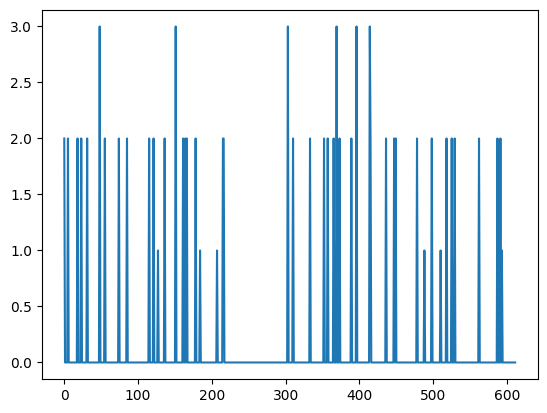

In [60]:
plt.plot(objetivos)
plt.show()

In [63]:
#Anilizar los resultados de la agrupación
print(type(objetivos))
print(len(objetivos))
arr_=objetivos
print(type(arr_))
print(len(arr_))

<class 'numpy.ndarray'>
612
<class 'numpy.ndarray'>
612


In [65]:
arr_o=np.sort(arr_)
print(arr_o)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

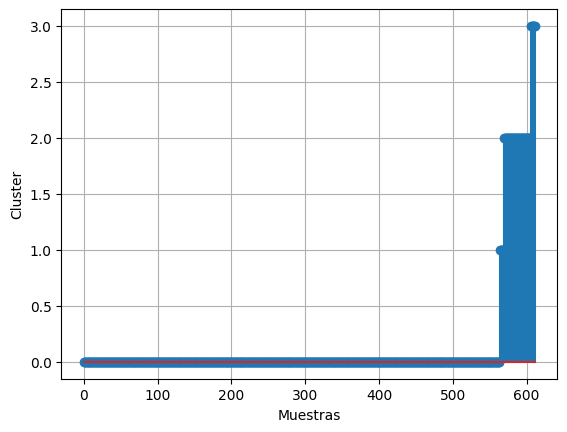

In [68]:
#Tipos de graficas para los resultados de la agrupación
plt.stem(arr_o)
plt.grid()
plt.xlabel('Muestras')
plt.ylabel('Cluster')
plt.show()

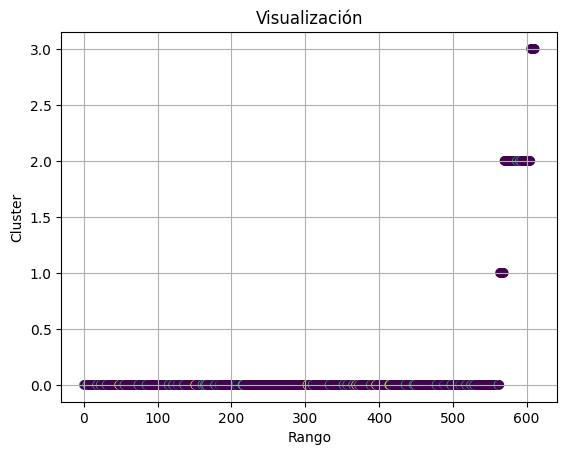

In [76]:
#Realizar una grafica de dos dimensiones para el agrupamiento
rango=range(0,len(arr_o))
plt.scatter(rango,arr_o,c=Kmeans.labels_)
plt.xlabel('Rango')
plt.ylabel('Cluster')
plt.title('Visualización')
plt.grid()
plt.show()

In [86]:
new_df2.head(1)

,Peri,Trimestre,Opera,Segmento_N,Tecg_N,Ter_N,Abo
0,2021,2,256,1,4,1,2445692


In [93]:
datos_=new_df2[['Tecg_N']]
datos_['Abo_']=new_df2['Abo']
datos_

<ipython-input-93-ada788206df5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_['Abo_']=new_df2['Abo']


,Tecg_N,Abo_
0,4,2445692
1,3,708
2,4,3026
3,3,650189
4,3,1472
...,...,...
607,2,2
608,4,53791
609,4,2752
610,4,2523


In [96]:
#Modelo usando BDSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(datos_)


DBSCAN(eps=0.05)

In [97]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1